## **Materia: Elementos del aprendizaje y Big Data**

*   Elemento de la lista
*   Elemento de la lista


Profesor: Valentín Barco

Grupo: 5


Interrogantes:

•	Macchia Sebastian

•	Paglino Guillermo

•	Peña Matias

•	Rodriguez Mikael

# **Montamos biblioteca drive**

In [1]:
# Montar Google Drive en Google Colab para acceder a archivos almacenados en Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importamos las bibliotecas y cargamos los datos**

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.graph_objs as go
!pip install us
import us  # Importar la librería us
!pip install --upgrade plotly





# **Preparacion para carga de datos**






In [3]:
# Cargar el conjunto de datos
crimenes = "/content/drive/MyDrive/Clustering/Trabajo Clustering/Crimenes.csv"
data_crimenes = pd.read_csv(crimenes)

data_crimenes.head()


,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Estadísticas descriptivas


In [4]:
data_crimenes.describe()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**Informacion del dataframe**

In [5]:
data_crimenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estado            50 non-null     object 
 1   Asesinatos        50 non-null     float64
 2   Asaltos           50 non-null     int64  
 3   Poblacion Urbana  50 non-null     int64  
 4   Violaciones       50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# **Procesamiento de datos**




In [6]:
# Mostrar el DataFrame original
print("Original DataFrame:")
print(data_crimenes.head())

# Copiar el DataFrame original
data_crimenes_nor = data_crimenes.copy()


Original DataFrame:
       Estado  Asesinatos  Asaltos  Poblacion Urbana  Violaciones
0     Alabama        13.2      236                58         21.2
1      Alaska        10.0      263                48         44.5
2     Arizona         8.1      294                80         31.0
3    Arkansas         8.8      190                50         19.5
4  California         9.0      276                91         40.6


Vision compoleta dataframe Crimenes Normalizada

In [7]:
data_crimenes_nor

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


Descripcion de dataframe Crimenes Organizados

In [8]:
data_crimenes_nor.describe()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


#Nos aseguramos que data_crimenes_nor sean datos numericos

In [9]:

print(data_crimenes_nor.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estado            50 non-null     object 
 1   Asesinatos        50 non-null     float64
 2   Asaltos           50 non-null     int64  
 3   Poblacion Urbana  50 non-null     int64  
 4   Violaciones       50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [10]:
#Verificamos Valores faltantes
data_crimenes_nor_limpio = data_crimenes_nor.isnull().sum()
data_crimenes_nor_limpio


Estado              0
Asesinatos          0
Asaltos             0
Poblacion Urbana    0
Violaciones         0
dtype: int64

In [11]:
#Valores Infinitos o NaN:
data_crimenes_nor_limpio.isin([np.inf, -np.inf, np.nan]).sum()
data_crimenes_nor_limpio


Estado              0
Asesinatos          0
Asaltos             0
Poblacion Urbana    0
Violaciones         0
dtype: int64

In [12]:
data_crimenes_nor

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

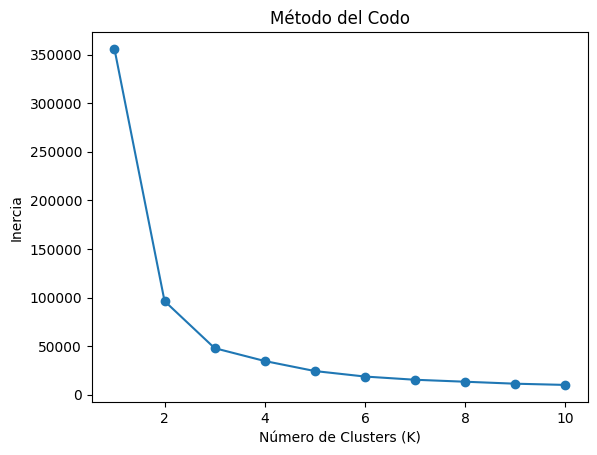

In [13]:
# Seleccionar solo las columnas numéricas normalizadas para el clustering
data_crimenes_cluster = data_crimenes_nor[['Asesinatos',  'Asaltos','Poblacion Urbana', 'Violaciones']]

# Calcular la inercia para diferentes valores de K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_crimenes_cluster)
    inertia.append(kmeans.inertia_)

# Visualizar la curva del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.show()


**Elección del número de clusters (K)**



***Utilizamos método del codo para elegir el número óptimo de clusters.***


 Entrenamiento del modelo K-Means

 Basándonos en la curva del codo, elige un valor de K (n_clusters) en donde la curva empiece a tomar "impulso"

Ya estan los grupos armados, se los debe incorporar a nuestro dataframe

In [14]:
# Elegir el valor de K
k = 4

# Ajustar el modelo KMeans excluyendo la columna 'Estado'
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_crimenes_nor.drop('Estado', axis=1))

# Agregar las etiquetas de los clusters al DataFrame original
data_crimenes_nor['KMean_Cluster'] = kmeans.predict(data_crimenes_nor.drop('Estado', axis=1))

# Mostrar las primeras filas del DataFrame con las etiquetas de los clusters
data_crimenes_nor


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,KMean_Cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


Visualización de resultados

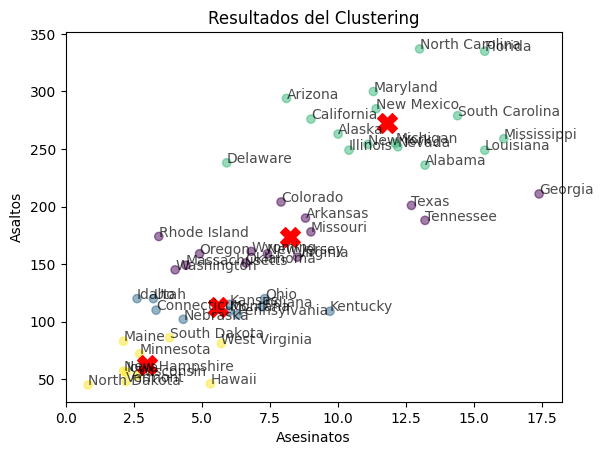

In [15]:
# Visualizar los resultados en un gráfico de dispersión 2D
plt.scatter(data_crimenes_nor['Asesinatos'], data_crimenes_nor['Asaltos'], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.title('Resultados del Clustering')
plt.xlabel('Asesinatos')
plt.ylabel('Asaltos')

# Etiquetar cada punto con el nombre del Estado
for i, estado in enumerate(data_crimenes_nor['Estado']):
    plt.annotate(estado, (data_crimenes_nor['Asesinatos'].iloc[i], data_crimenes_nor['Asaltos'].iloc[i]), alpha=0.7)

plt.show()


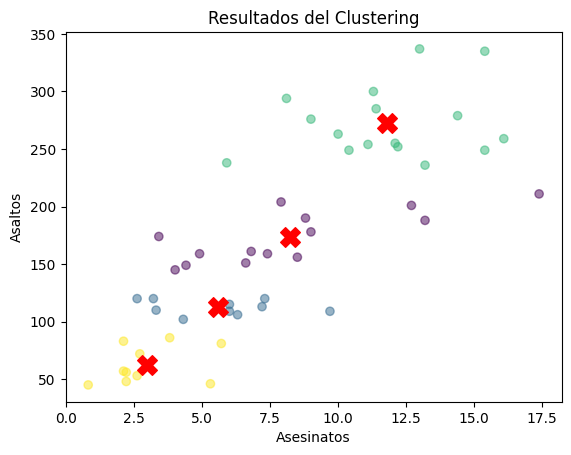

In [16]:
# Visualizar los resultados en un gráfico de dispersión 2D sin etiquetas de estados
plt.scatter(data_crimenes_nor['Asesinatos'], data_crimenes_nor['Asaltos'], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.title('Resultados del Clustering')
plt.xlabel('Asesinatos')
plt.ylabel('Asaltos')
plt.show()


Podemos definir las zonas de riesgo:

Dado que poseemos múltiples características inherentes a nuestros grupos, la
representación gráfica directa de estas características resulta impracticable. No obstante, emplearemos una función de la biblioteca scikit-learn que nos posibilitará la generación de dos grupos similares para condensar estas características, con el propósito exclusivo de proporcionar una visualización concisa de nuestros resultados.







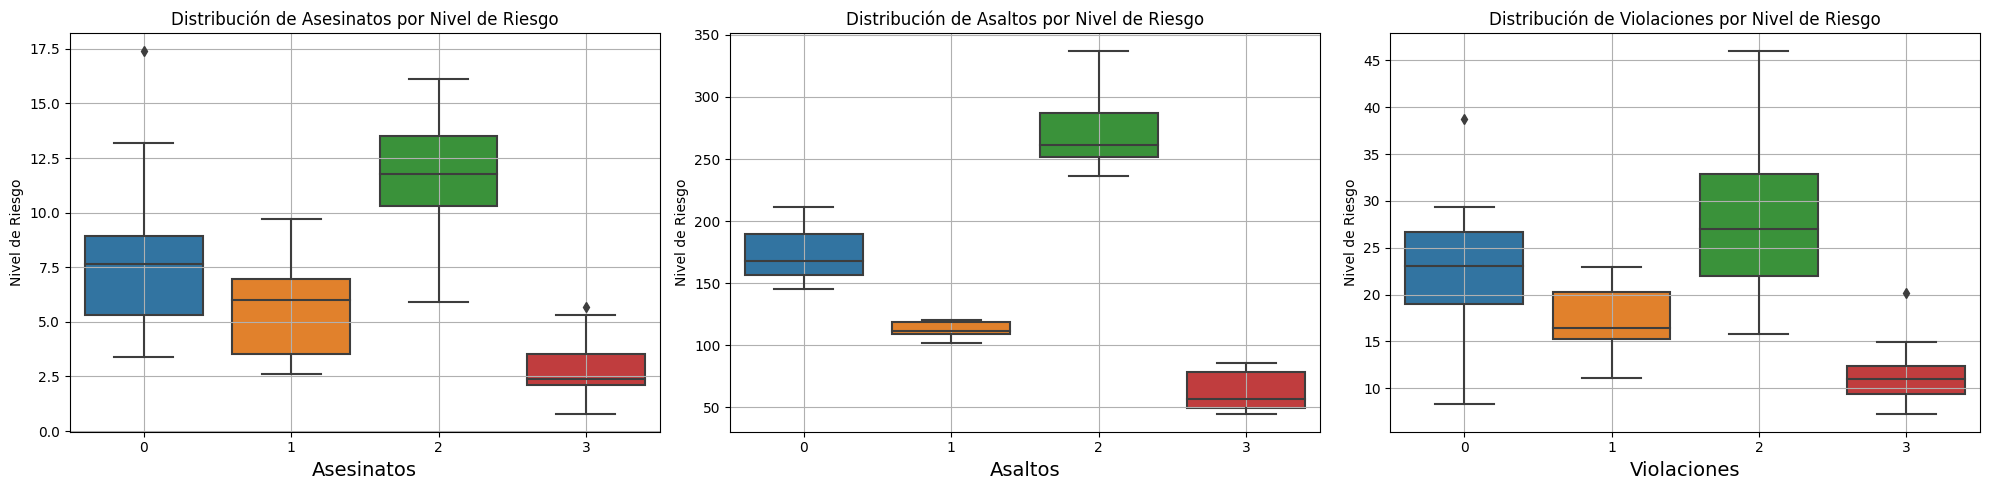

In [17]:
import seaborn as sns

# Crear subgráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Boxplot para Asesinatos
sns.boxplot(x='KMean_Cluster', y='Asesinatos', data=data_crimenes_nor, ax=axes[0])
axes[0].set_xlabel('Asesinatos', fontsize=14)
axes[0].set_ylabel('Nivel de Riesgo')
axes[0].set_title('Distribución de Asesinatos por Nivel de Riesgo')
axes[0].grid(True)

# Boxplot para Asaltos
sns.boxplot(x='KMean_Cluster', y='Asaltos', data=data_crimenes_nor, ax=axes[1])
axes[1].set_xlabel('Asaltos', fontsize=14)
axes[1].set_ylabel('Nivel de Riesgo')
axes[1].set_title('Distribución de Asaltos por Nivel de Riesgo')
axes[1].grid(True)

# Boxplot para Violaciones
sns.boxplot(x='KMean_Cluster', y='Violaciones', data=data_crimenes_nor, ax=axes[2])
axes[2].set_xlabel('Violaciones', fontsize=14)
axes[2].set_ylabel('Nivel de Riesgo')
axes[2].set_title('Distribución de Violaciones por Nivel de Riesgo')
axes[2].grid(True)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


Raíz grafico BloxPlot podemos definir que cluster 2 es alto riesgo, Cluster 3 es bajo riesgo, cluster 1 bajo medio riesgo y cluester 0 es medio riesgo

# **Como conclusion**

Divido el dataframe data_crimenes_limpio en 3 sub datas para agilizar lectura de datos

In [23]:
# DataFrame para 'zona de riesgo bajo'
df_riesgo_bajo = data_crimenes_nor[data_crimenes_nor['KMean_Cluster'] == 3]

# DataFrame para 'zona de riesgo medio'
df_riesgo_medio = data_crimenes_nor[data_crimenes_nor['KMean_Cluster'] == 0]

# DataFrame para 'zona de riesgo medio bajo'
df_riesgo_medio_bajo = data_crimenes_nor[data_crimenes_nor['KMean_Cluster'] == 1]

# DataFrame para 'zona de riesgo alto'
df_riesgo_alto = data_crimenes_nor[data_crimenes_nor['KMean_Cluster'] == 2]

Dataframe Zonas de bajo riesgo

In [24]:
df_riesgo_bajo

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,KMean_Cluster
10,Hawaii,5.3,46,83,20.2,3
14,Iowa,2.2,56,57,11.3,3
18,Maine,2.1,83,51,7.8,3
22,Minnesota,2.7,72,66,14.9,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3
44,Vermont,2.2,48,32,11.2,3
47,West Virginia,5.7,81,39,9.3,3
48,Wisconsin,2.6,53,66,10.8,3


Top 5 con menos riesgos a Asesinatos

In [25]:
# Ordenar por el índice de 'Asesinatos' de menor a mayor
df_riesgo_bajo_sorted = df_riesgo_bajo.sort_values(by='Asesinatos')

# Mostrar las 5 más bajas
bottom_5_riesgo_bajo = df_riesgo_bajo_sorted.head(5)
bottom_5_riesgo_bajo


,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,KMean_Cluster
33,North Dakota,0.8,45,44,7.3,3
18,Maine,2.1,83,51,7.8,3
28,New Hampshire,2.1,57,56,9.5,3
14,Iowa,2.2,56,57,11.3,3
44,Vermont,2.2,48,32,11.2,3


# **Dataframe de Zona de riesgo alto**

In [21]:
df_riesgo_alto

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,KMean_Cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
17,Louisiana,15.4,249,66,22.2,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2


Top 5 ciudades mas peligrossas con mas indice de Asesinatos

In [22]:
# Ordenar por el índice de 'Asesinatos' de mayor a menor
df_riesgo_alto_sorted = df_riesgo_alto.sort_values(by='Asesinatos', ascending=False)

# Mostrar las 5 más altas
top_5_riesgo_alto = df_riesgo_alto_sorted.head(5)
top_5_riesgo_alto



,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,KMean_Cluster
23,Mississippi,16.1,259,44,17.1,2
8,Florida,15.4,335,80,31.9,2
17,Louisiana,15.4,249,66,22.2,2
39,South Carolina,14.4,279,48,22.5,2
0,Alabama,13.2,236,58,21.2,2


Podemos concluir que de las ciudades mas riesgosas, la que mas Asesinatos tiene es Mississippi